<a href="https://colab.research.google.com/github/OhYeahMrKrabsKrab/ISCS-30.65-M1/blob/main/Working_with_Images_(Encoding).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN Based Autoencoder

Source: https://www.geeksforgeeks.org/implement-convolutional-autoencoder-in-pytorch-with-cuda/



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16,
                               kernel_size=3,
                               stride=2,
                               padding=1,
                               output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3,
                               kernel_size=3,
                               stride=2,
                               padding=1,
                               output_padding=1),
            nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        x = self.flatten(x)

        return x
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# Initialize the autoencoder
model = Autoencoder()

# Define transform
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

# Load dataset
train_dataset = datasets.Flowers102(root='flowers',
                                    split='train',
                                    transform=transform,
                                    download=True)
test_dataset = datasets.Flowers102(root='flowers',
                                   split='test',
                                   transform=transform)
# Define the dataloader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=128,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=128)

# Move the model to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the autoencoder
num_epochs = 50
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.to(device)
        optimizer.zero_grad()
        output = model(img)
        loss = criterion(output, img)
        loss.backward()
        optimizer.step()
    if epoch % 5== 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Save the model
torch.save(model.state_dict(), 'conv_autoencoder.pth')

100%|██████████| 344862509/344862509 [00:13<00:00, 25531284.51it/s]


Extracting flowers/flowers-102/102flowers.tgz to flowers/flowers-102


100%|██████████| 502/502 [00:00<00:00, 457030.74it/s]


100%|██████████| 14989/14989 [00:00<00:00, 12231210.63it/s]


cpu
Epoch [1/50], Loss: 0.0950
Epoch [6/50], Loss: 0.0712
Epoch [11/50], Loss: 0.0289
Epoch [16/50], Loss: 0.0180
Epoch [21/50], Loss: 0.0147
Epoch [26/50], Loss: 0.0117
Epoch [31/50], Loss: 0.0100
Epoch [36/50], Loss: 0.0098
Epoch [41/50], Loss: 0.0086
Epoch [46/50], Loss: 0.0078


### Display the reconstructed version of flowers

<Figure size 1600x1200 with 0 Axes>

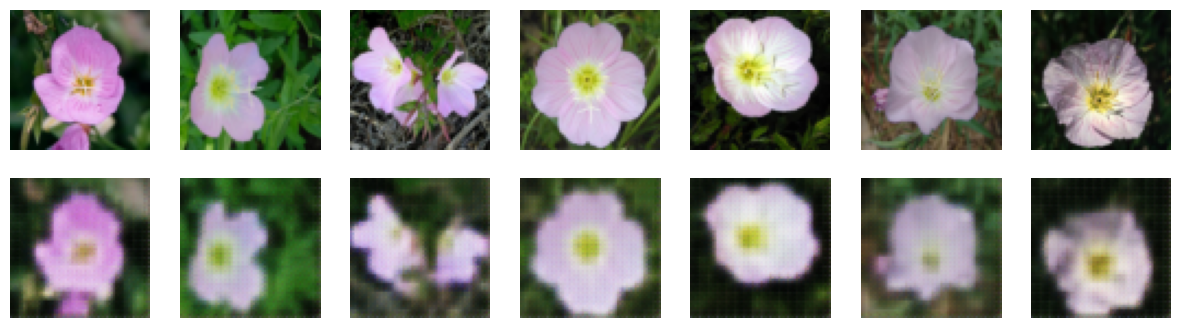

In [ ]:
%matplotlib inline
with torch.no_grad():
    for data, _ in test_loader:
        data = data.to(device)
        recon = model(data)
        break

import matplotlib.pyplot as plt
plt.figure(dpi=250)
fig, ax = plt.subplots(2, 7, figsize=(15, 4))
for i in range(7):
    ax[0, i].imshow(data[i].cpu().numpy().transpose((1, 2, 0)))
    ax[1, i].imshow(recon[i].cpu().numpy().transpose((1, 2, 0)))
    ax[0, i].axis('OFF')
    ax[1, i].axis('OFF')
plt.show()

### TODO: Item D

### TODO: Item E